<a href="https://colab.research.google.com/github/demanghon/tensorflow-learning/blob/main/First_neutral_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

assert hasattr(tf, "function") #Be sure to use tensorflow

Load dataset: Fashion MNIST

In [2]:
#Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_,_) = fashion_mnist.load_data()

#Get only a subpart of dataset
images = images[:10000]
targets = targets[:10000]

4422102/4422102 [==============================] - 0s 0us/step
(10000, 28, 28)
(10000,)


Plot one of the data

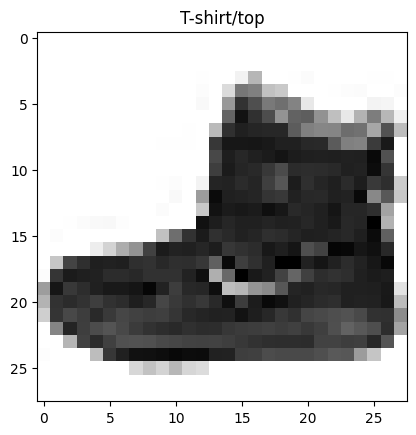

In [20]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.imshow(images[0], cmap="binary")
plt.title(targets_names[0])
plt.show()

Create the model

In [24]:
#Create the model
model = tf.keras.models.Sequential()
#Add operation executed when model.predict is called
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

print("Shape of image", images[0:1].shape)
model_output = model.predict(images[0:1])
print("Shape of the image after the Flatten", model_output.shape)

Shape of image (1, 28, 28)
1/1 [==============================] - 0s 57ms/step
Shape of the image after the Flatten (1, 784)


Add the layers

In [39]:
#Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

#Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_ouput = model.predict(images[0:1])
print(model_output, targets[0:1])

1/1 [==============================] - 0s 82ms/step
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.
    0.  13.  73.   0.   0.   1.   4.   0.   0.   0.   0.   1.   1.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   0.
   36. 136. 127.  62.  54.   0.   0.   0.   1.   3.   4.   0.   0.   3.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   6.   0.
  102. 204. 176. 134. 144. 123.  23.   0.   0.   0.   0.  12.  10.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  155. 236. 

Model summary

In [31]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [42]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

Train the model

In [43]:
history = model.fit(images, targets, epochs=10)modemode

Epoch 1/10
313/313 [==============================] - 2s 4ms/step - loss: 2.3024 - accuracy: 0.0973
Epoch 2/10
313/313 [==============================] - 2s 5ms/step - loss: 2.3024 - accuracy: 0.0983
Epoch 3/10
313/313 [==============================] - 2s 6ms/step - loss: 2.3024 - accuracy: 0.1017
Epoch 4/10
313/313 [==============================] - 2s 5ms/step - loss: 2.3024 - accuracy: 0.0997
Epoch 5/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.0980
Epoch 6/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.1008
Epoch 7/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.0998
Epoch 8/10
313/313 [==============================] - 1s 5ms/step - loss: 2.3024 - accuracy: 0.1013
Epoch 9/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.1002
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 2.3024 - accuracy: 0.1004

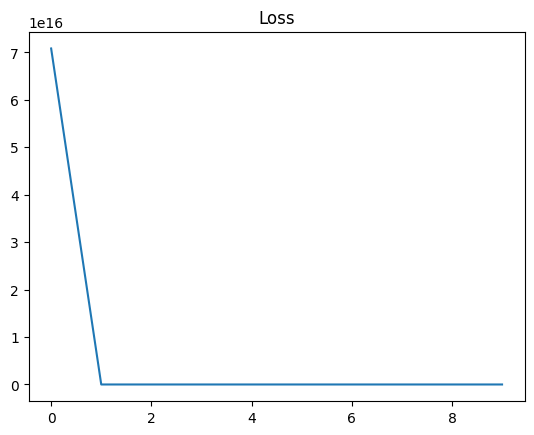

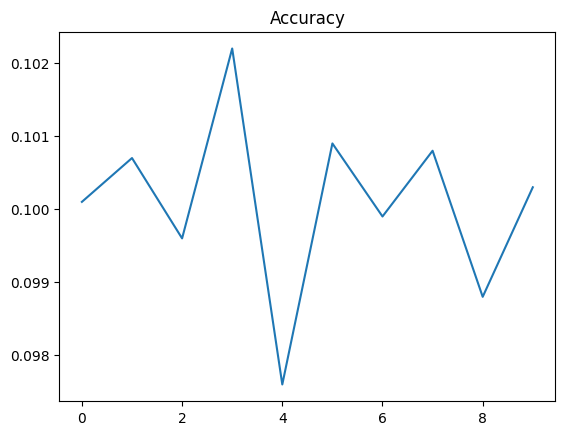

In [38]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()